In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [2]:
np.random.seed(7)
torch.manual_seed(7);

In [3]:
x_values = np.array([i for i in range(11)])
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = np.concatenate([np.random.choice(2, 5, p=[0.8, 0.2]), 
                           np.random.choice(2, 6, p=[0.2, 0.8])])
                           
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

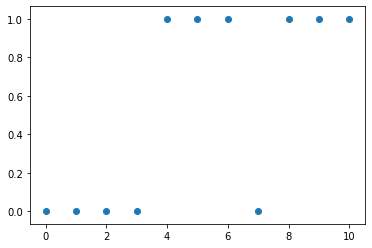

In [4]:
plt.scatter(x_train, y_train);

In [5]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = F.sigmoid(self.linear(x))
        return out

In [6]:
inputDim = 1
outputDim = 1 
learningRate = 0.5
epochs = 1000

In [7]:
model = LogisticRegression(inputDim, outputDim)

In [8]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [9]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    if epoch%100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, loss 0.642431378364563
epoch 100, loss 0.39907681941986084
epoch 200, loss 0.39638397097587585
epoch 300, loss 0.39616984128952026
epoch 400, loss 0.3961496651172638
epoch 500, loss 0.39614763855934143
epoch 600, loss 0.3961474597454071
epoch 700, loss 0.3961474597454071
epoch 800, loss 0.3961474299430847
epoch 900, loss 0.3961474597454071


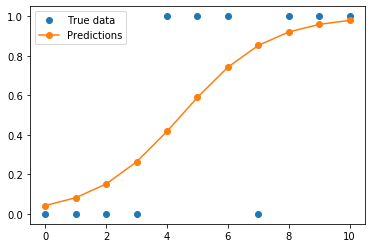

In [10]:
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_train)).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'o', label='True data')
plt.plot(x_train, predicted, '-o', label='Predictions')
plt.legend(loc='best')
plt.show()